### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

### Part 1 - Take Home Exercises

### Sections

1. The Data
2. Data Preparation
3. Data Transformation
    - Converting Dictionary into Pandas Dataframe
    - Familiarizing yourself with the Data
        - [**Exercise 2**](#cell2)
4. Data Mining using Pandas
    - Missing Values
        - [**Exercise 5**](#cell5)
    - Dealing with Duplicate Data
5. Data Preprocessing
    - Sampling
        - [**Exercise 6**](#cell6)
        - [**Exercise 8**](#cell8)
    - Feature Creation
    - Feature subset selection
        - [**Exercise 10**](#cell10)
        - [**Exercise 11**](#cell11)
    - Dimensionality Reduction
        - [**Exercise 12**](#cell12)
    - Attribute Transformation / Aggregation
        - [**Exercise 13**](#cell13)
        - [**Exercise 14**](#cell14)
        - [**Exercise 15**](#cell15)
    - Discretization and Binarization
        - [**Exercise 16**](#cell16)
6. Data Exploration

#### Data Preparation 


In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
len(twenty_train.data)

2257

#### Converting Dictionary into Pandas Dataframe

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [5]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


<a id="cell2"></a>
####  **Exercise 2**

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
# My Answer:
X.loc[:7, 'text':'category']

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2


<a id="cell5"></a>
#### **Exercise 5**

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['isnull'] = NA_df['missing_example'].isnull()

NA_df.loc[0, 'type'] = type(NA_df.loc[0, 'missing_example'])
NA_df.loc[1, 'type'] = type(NA_df.loc[1, 'missing_example'])
NA_df.loc[2, 'type'] = type(NA_df.loc[2, 'missing_example'])
NA_df.loc[3, 'type'] = type(NA_df.loc[3, 'missing_example'])
NA_df.loc[4, 'type'] = type(NA_df.loc[4, 'missing_example'])
NA_df.loc[5, 'type'] = type(NA_df.loc[5, 'missing_example'])

NA_df

,id,missing_example,isnull,type
0,A,NaN,True,<class 'float'>
1,B,NaN,True,<class 'float'>
2,C,NaN,False,<class 'str'>
3,D,None,False,<class 'str'>
4,E,None,True,<class 'NoneType'>
5,F,,False,<class 'str'>


- A -> T : In pandas, None is also treated as a missing value. None is a built-in constant in Python.
- B -> T : Nothing there.
- C -> F : It's a string.
- D -> F : It's a string.
- E -> T : Its type is Nonetype.
- F -> F : It's a empty string.

<a id="cell6"></a>
#### **Exercise 6**

Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
X_sample = X.sample(n=1000)

In [9]:
X.shape

(2257, 3)

In [10]:
X_sample.shape

(1000, 3)

In [11]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [12]:
X_sample[:10]

,text,category,category_name
1052,From: bassili@cs.arizona.edu (Amgad Z. Bassili...,3,soc.religion.christian
426,From: pww@spacsun.rice.edu (Peter Walker) Subj...,0,alt.atheism
483,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
1250,From: renouar@amertume.ufr-info-p7.ibp.fr (Ren...,1,comp.graphics
2112,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med
261,From: mchamberland@violet.uwaterloo.ca (Marc C...,3,soc.religion.christian
336,From: zeno@phylo.genetics.washington.edu (Sean...,1,comp.graphics
1730,From: bio1@navi.up.ac.za (Fourie Joubert) Subj...,1,comp.graphics
1439,From: bhjelle@carina.unm.edu () Subject: Re: M...,2,sci.med
200,From: johnsd2@rpi.edu (Dan Johnson) Subject: R...,3,soc.religion.christian


<a id="cell8"></a>
#### **Exercise 8** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:>

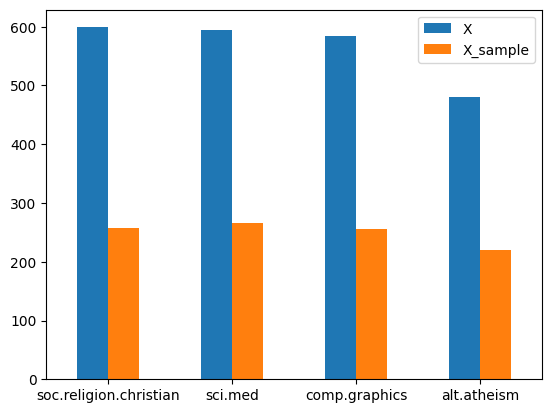

In [13]:
df = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()}, index=["soc.religion.christian", "sci.med", "comp.graphics", "alt.atheism"])

df.plot.bar(rot=0)

<a id="cell10"></a>
#### **Exercise 10**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

X_sub_counts = X_counts[4, 0:100].toarray()

X_sub_counts


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [15]:
np.nonzero(X_sub_counts)

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))

In [16]:
count_vect.get_feature_names_out()[37]

'01'

<a id="cell11"></a>
#### **Exercise 11**

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

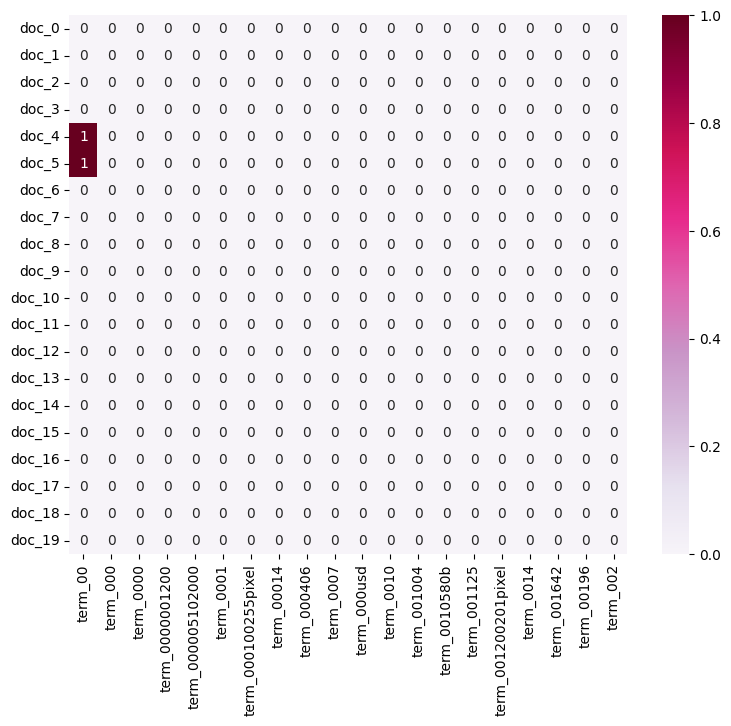

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

<a id="cell12"></a>
#### **Exercise 12**

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

<a id="cell13"></a>
#### **Exercise 13**

If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

<a id="cell14"></a>
#### **Exercise 14**

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


<a id="cell15"></a>
#### **Exercise 15**

Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

<a id="cell16"></a>
#### **Exercise 16**

Try to generate the binarization using the `category_name` column instead. Does it work?